Tristan MANIER - Léa GRASSIEN - Mathieu RAMEL - INFO 5 - 9/01/2024


# 1. Présentation des données

Pourquoi avons nous choisis ces données ?
TODO

source, conditions de recueil, nombre de fichiers, nombres de variables et d'individus, expliquer l'activité derrière les données.
TODO
Notre dataset contient deux fichiers : eCO2mix_RTE_En-cours-TR.csv, donnees-synop-essentielles-omm.csv 
Le fichier eCO2mix_RTE_En-cours-TR.csv contient les données de consommation et de production en électricité en France, les échanges d'éléctricité avec d'autres pays Européens sur une période allant de juin 2022 à fin 2023.
Le fichier donnees-synop-essentielles-omm.csv contient les données météorologiques de la France sur les années 2022 à 2023.

Donnez la signification desindividus et des variables
TODO

## Questions

### Analyse
Nous allons chercher à répondre à ces questions :
- Quelles sont les sources de production d'énergie les plus corrélées ?
- Quelles est la proportion d'énergie renouvelable produite ?
- Quelles sont les tendances de méthode de production d'énergie au cours de l'année ?
- Quelles sont les périodes de l'année où la production d'énergie est la plus importante/faible ?
- Quelles sont les moments de la journée où la production d'énergie est la plus importante/faible ?
- La météo influe-t-elle sur la consomation d'énergie ?
- Quelles sont les sources de production d'énergie les plus corrélées avec la météo ?
- Classification des jousrs de l'année par rapport à la consomation d'énergie.

### Prédictions
- Quelle est la tendance de production d'énergie pour les jours/mois/années à venir ?

Aprrentissage supervisé ET non supervisé

# 2. Préparation des données

Ce notebook présente les commandes utiles pour les principales tâches de préparation des données. Les données `notes.data` qui servent d'illustration sont des notes obtenues par des étudiants dans des matières.

In [67]:
import pandas as pd
pd.set_option('display.max_rows', 100)     # Set the maximum number of rows displayed to 100 rows

import math

## 2.1 Premier dataset sur la production d'énergie

In [68]:
file_name = "eCO2mix_RTE_En-cours-TR.csv"

df = pd.read_csv(file_name, sep="\t", encoding='latin-1', index_col=False)

df.head()

C:\Users\tmani\AppData\Local\Temp\ipykernel_14448\1020470220.py:3: DtypeWarning: Columns (5,26,27,30,31,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_name, sep="\t", encoding='latin-1', index_col=False)


,Périmètre,Nature,Date,Heures,Consommation,Prévision J-1,Prévision J,Fioul,Charbon,Gaz,...,Hydraulique - Fil de l?eau + éclusée,Hydraulique - Lacs,Hydraulique - STEP turbinage,Bioénergies - Déchets,Bioénergies - Biomasse,Bioénergies - Biogaz,Stockage batterie,Déstockage batterie,Eolien terrestre,Eolien offshore
0,France,Données temps réel,2022-06-01,00:00,44940.0,44800,45100.0,144.0,0.0,3596.0,...,4331,1054,1677.0,170,584.0,286.0,ND,ND,ND,ND
1,France,Données temps réel,2022-06-01,00:15,43967.0,43700,43900.0,144.0,0.0,3716.0,...,4163,1419,581.0,171,560.0,276.0,ND,ND,ND,ND
2,France,Données temps réel,2022-06-01,00:30,42514.0,42600,42700.0,142.0,0.0,2880.0,...,4187,1280,530.0,169,561.0,276.0,ND,ND,ND,ND
3,France,Données temps réel,2022-06-01,00:45,41073.0,41450,41600.0,143.0,0.0,2699.0,...,4054,1120,361.0,170,563.0,276.0,ND,ND,ND,ND
4,France,Données temps réel,2022-06-01,01:00,40359.0,40300,40500.0,144.0,3.0,2718.0,...,4068,1101,373.0,170,563.0,276.0,ND,ND,ND,ND


Renommage des colonnes pour retirer les espaces et faciliter la selection ensuite

In [69]:
df.columns = [c.replace(' ', '_') for c in df.columns]
df.head()

,Périmètre,Nature,Date,Heures,Consommation,Prévision_J-1,Prévision_J,Fioul,Charbon,Gaz,...,Hydraulique_-_Fil_de_l?eau_+_éclusée,Hydraulique_-_Lacs,Hydraulique_-_STEP_turbinage,Bioénergies_-_Déchets,Bioénergies_-_Biomasse,Bioénergies_-_Biogaz,_Stockage_batterie,Déstockage_batterie,Eolien_terrestre,Eolien_offshore
0,France,Données temps réel,2022-06-01,00:00,44940.0,44800,45100.0,144.0,0.0,3596.0,...,4331,1054,1677.0,170,584.0,286.0,ND,ND,ND,ND
1,France,Données temps réel,2022-06-01,00:15,43967.0,43700,43900.0,144.0,0.0,3716.0,...,4163,1419,581.0,171,560.0,276.0,ND,ND,ND,ND
2,France,Données temps réel,2022-06-01,00:30,42514.0,42600,42700.0,142.0,0.0,2880.0,...,4187,1280,530.0,169,561.0,276.0,ND,ND,ND,ND
3,France,Données temps réel,2022-06-01,00:45,41073.0,41450,41600.0,143.0,0.0,2699.0,...,4054,1120,361.0,170,563.0,276.0,ND,ND,ND,ND
4,France,Données temps réel,2022-06-01,01:00,40359.0,40300,40500.0,144.0,3.0,2718.0,...,4068,1101,373.0,170,563.0,276.0,ND,ND,ND,ND


Affichage des données non-définies

In [70]:
temp = ({
    'column':[],
    'type':[],
    'nb_lines' :[],
    'nb_ND':[]
})

nd = pd.DataFrame(temp)

for column in df.columns : 

    new_row = pd.DataFrame({'column': column, 'type': df[column].dtype, 'nb_lines': df[column].count(), 'nb_ND': (df[column] == 'ND').sum()}, index=[0])
    nd = pd.concat([new_row, nd.loc[:]]).reset_index(drop=True)
nd = nd.sort_values(by='nb_ND', ascending=False)

nd["%ND"] = nd["nb_ND"] / nd["nb_lines"] * 100

nd

,column,type,nb_lines,nb_ND,%ND
0,Eolien_offshore,object,56398.0,39838.0,70.637257
1,Eolien_terrestre,object,56398.0,39838.0,70.637257
2,Déstockage_batterie,object,56398.0,28224.0,50.044328
3,_Stockage_batterie,object,56398.0,28224.0,50.044328
34,Prévision_J-1,object,56640.0,95.0,0.167726
9,Hydraulique_-_Fil_de_l?eau_+_éclusée,object,56398.0,8.0,0.014185
12,Gaz_-_Cogén.,object,56398.0,7.0,0.012412
13,Gaz_-_TAC,object,56398.0,6.0,0.010639
8,Hydraulique_-_Lacs,object,56398.0,3.0,0.005319
6,Bioénergies_-_Déchets,object,56398.0,1.0,0.001773


Type de la date incorrect

In [71]:
df["Date"] = pd.to_datetime(df["Date"])

Suppression des lignes sans information de consommation et sans prédiction 

In [72]:
df = df[df['Prévision_J-1'] != 'ND']
df = df[:-1]

Hydrolique est décomposé en 3 catégories : 'Hydraulique - Fil de l?eau + éclusée', 'Hydraulique - Lacs', 'Hydraulique - STEP turbinage' \
Bioénergies est décomposé en 3 catégories : 'Bioénergies - Déchets', 'Bioénergies - Biomasse', 'Bioénergies - Biogaz' \
Eolien est décomposé en 2 catégories : 'Eolien terrestre', 'Eolien offshore' \
Fioul est décomposé en 3 catégories : 'Fioul - TAC', 'Fioul - Cogén.', 'Fioul - Autres' \
Gaz est décomposé en 3 catégories :  'Gaz - TAC', 'Gaz - Cogén.', 'Gaz - CCG', 'Gaz - Autres' 

Les deux colonnes sur les batteries ne semble pas pertinente non plus.

In [73]:
list_energy = ['Périmètre', 'Date', 'Heures', 'Consommation',
       'Prévision_J-1', 'Prévision_J', 'Fioul', 'Charbon', 'Gaz', 'Nucléaire',
       'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies',
       'Ech._physiques', 'Taux_de_Co2', 'Ech._comm._Angleterre',
       'Ech._comm._Espagne', 'Ech._comm._Italie', 'Ech._comm._Suisse',
       'Ech._comm._Allemagne-Belgique']

for col_name in df.columns:
    if col_name not in list_energy:

        df = df.drop(col_name, axis=1)

In [74]:
columns_to_sum = ['Fioul', 'Charbon', 'Gaz', 'Nucléaire', 'Eolien', 'Solaire', 'Hydraulique', 'Pompage', 'Bioénergies']
df ['Production'] = df[columns_to_sum].sum(axis=1)

In [75]:
print(f"{df.shape[0]} rows and {df.shape[1]} columns")

# Combine dtypre, count and nnunique
pd.concat([df.dtypes, df.count(), df.nunique()], keys=["Types", "Count", "NUnique"], axis=1)

56545 rows and 23 columns


,Types,Count,NUnique
Périmètre,object,56545,1
Date,datetime64[ns],56545,590
Heures,object,56545,96
Consommation,float64,56398,28441
Prévision_J-1,object,56545,2153
Prévision_J,float64,56448,2038
Fioul,float64,56398,1154
Charbon,float64,56398,1607
Gaz,float64,56398,8857
Nucléaire,float64,56398,21598


Ici on observe que les types des colonnes restantes sont plus logiques, on obtient plus de float au lieu de type object sur des colonnes decrivant une consommation ou une production.

### Statistiques descriptives des valeurs non-définies

In [76]:
temp = ({
    'column':[],
    'nb_lines' :[],
    'nb_ND':[]
})

nd = pd.DataFrame(temp)

for column in df.columns : 
    new_row = pd.DataFrame({'column': column, 'nb_lines': df[column].count(), 'nb_ND': (df[column] == 'ND').sum()}, index=[0])
    nd = pd.concat([new_row, nd.loc[:]]).reset_index(drop=True)
nd = nd.sort_values(by='nb_ND', ascending=False)

nd["%ND"] = nd["nb_ND"] / nd["nb_lines"] * 100

nd

,column,nb_lines,nb_ND,%ND
0,Production,56545.0,0.0,0.0
12,Eolien,56398.0,0.0,0.0
21,Date,56545.0,0.0,0.0
20,Heures,56545.0,0.0,0.0
19,Consommation,56398.0,0.0,0.0
18,Prévision_J-1,56545.0,0.0,0.0
17,Prévision_J,56448.0,0.0,0.0
16,Fioul,56398.0,0.0,0.0
15,Charbon,56398.0,0.0,0.0
14,Gaz,56398.0,0.0,0.0


## 2.2 Deuxième dataset sur les données météo

In [77]:
file_name = "weather.csv"

df_weather = pd.read_csv(file_name, sep=";", index_col=False, encoding='utf-8')

# df_weather.head()
print(f"{df_weather.shape[0]} rows and {df_weather.shape[1]} columns")

df_weather.head()

353491 rows and 60 columns


,numer_sta,date,pmer,tend,cod_tend,dd,ff,t,td,u,...,nnuage2,ctype2,hnuage2,nnuage3,ctype3,hnuage3,nnuage4,ctype4,hnuage4,Unnamed: 59
0,7005,20220101000000,102420,-10,7,170,2.100000,284.450000,283.350000,93,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
1,7015,20220101000000,102420,20,0,180,4.200000,284.650000,283.350000,92,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
2,7020,20220101000000,102090,-120,8,190,10.600000,285.750000,284.950000,95,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
3,7027,20220101000000,102360,-80,8,180,6.200000,286.050000,285.250000,95,...,mq,mq,mq,mq,mq,mq,mq,mq,mq,NaN
4,7037,20220101000000,102520,-60,6,150,3.500000,283.850000,283.250000,96,...,8,mq,1110,mq,mq,mq,mq,mq,mq,NaN


Selection des données d'une seule région. (Pourais être remplacer par une moyenne des régions) 

In [78]:
code_region = int('07149')  # Ile-de-France
df_weather = df_weather[df_weather["numer_sta"] == code_region]

# df_weather.head()
print(f"{df_weather.shape[0]} rows and {df_weather.shape[1]} columns")

5894 rows and 60 columns


Formattage des données météo.

Parmis toutes les données météo fournies, nous avons choisis de ne garder que les données les plus pertinantes pour nous. De plus, nous les avons renomer pour facilité leur utilisation et leur lisibilité.

In [79]:
#multiplier les colonnes par 3 pour avoir 1 lignes par heures
weather_rename_map = {
    'date': 'date',
    'pmer': 'pression_mer',
    'ff': 'vitesse_vent',
    't': 'température',
    'u': 'humidité',
    'pres': 'pression',
    'niv_bar': 'niveau_barometrique',
    'tn12': 't_min_12h',
    'tn24': 't_min_24h',
    'tx12': 't_max_12h',
    'tx24': 't_max_24h',
    'tminsol': 't_min_sol_12h',
    'rr1': 'précipitation_1h',
    'rr3': 'précipitation_3h',
    'rr6': 'précipitation_6h',
    'rr12': 'précipitation_12h',
    'rr24': 'précipitation_24h',
    'ssfrai': 'hauteur_neige'
}

df_weather = df_weather.rename(columns=weather_rename_map)

# remove columns not in weather_rename_map
for col_name in df_weather.columns.values.tolist():
    if col_name not in weather_rename_map.values():
        df_weather = df_weather.drop(col_name, axis=1)

df_weather = df_weather.reset_index(drop=True)

# convert object to float
for col_name in df_weather.columns.values.tolist():
    df_weather[col_name] = pd.to_numeric(df_weather[col_name], errors='coerce')

#df_weather.head()

#df_weather.dtypes

Suppresion des lignes avec des valeurs manquantes pour les dates et heures.

In [80]:
df = df.dropna(subset=['Date', "Heures"])

## 2.3 Jointure des deux datasets

Formatage des dates et heures des deux datasets.

In [81]:
# Concat date and hours
df['date'] = df['Date'].astype(str) + df['Heures'].astype(str)

# Convert to datetime
df['date'] = df['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d%H:%M'))

df_weather["date"] = df_weather['date'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d%H%M%S'))

Fusion des deux datasets

In [82]:
df_full = pd.merge(df, df_weather, how='inner', on = 'date' )

# full_df.head()
print(f"df : {df.shape[0]} rows and {df.shape[1]} columns")
print(f"df_weather : {df_weather.shape[0]} rows and {df_weather.shape[1]} columns")
print(f"df_full : {df_full.shape[0]} rows and {df_full.shape[1]} columns")

print(f"Data between {df_full['date'].min()} and {df_full['date'].max()}")

df : 56545 rows and 24 columns
df_weather : 5894 rows and 18 columns
df_full : 4686 rows and 41 columns
Data between 2022-06-01 00:00:00 and 2024-01-09 09:00:00


In [83]:
df_full.head()

,Périmètre,Date,Heures,Consommation,Prévision_J-1,Prévision_J,Fioul,Charbon,Gaz,Nucléaire,...,t_min_24h,t_max_12h,t_max_24h,t_min_sol_12h,hauteur_neige,précipitation_1h,précipitation_3h,précipitation_6h,précipitation_12h,précipitation_24h
0,France,2022-06-01,00:00,44940.0,44800,45100.0,144.0,0.0,3596.0,30207.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,France,2022-06-01,03:00,37702.0,37400,37900.0,144.0,6.0,3097.0,29203.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
2,France,2022-06-01,06:00,38891.0,38700,38800.0,144.0,8.0,3555.0,30596.0,...,NaN,293.05,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
3,France,2022-06-01,09:00,49126.0,49800,48800.0,144.0,12.0,3982.0,30629.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
4,France,2022-06-01,12:00,52351.0,52600,51600.0,142.0,10.0,3981.0,30514.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


# 3. Analyse des données

Selection d'une periode de temps

In [84]:
from matplotlib import pyplot as plt

#select rows between date1 and date 2
date1 = pd.to_datetime('2022-06-01')
date2 = pd.to_datetime('2024-09-01')

df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]

## La période a-t-elle une influence sur la production et la consommation ?

Visualisation des données de consomations

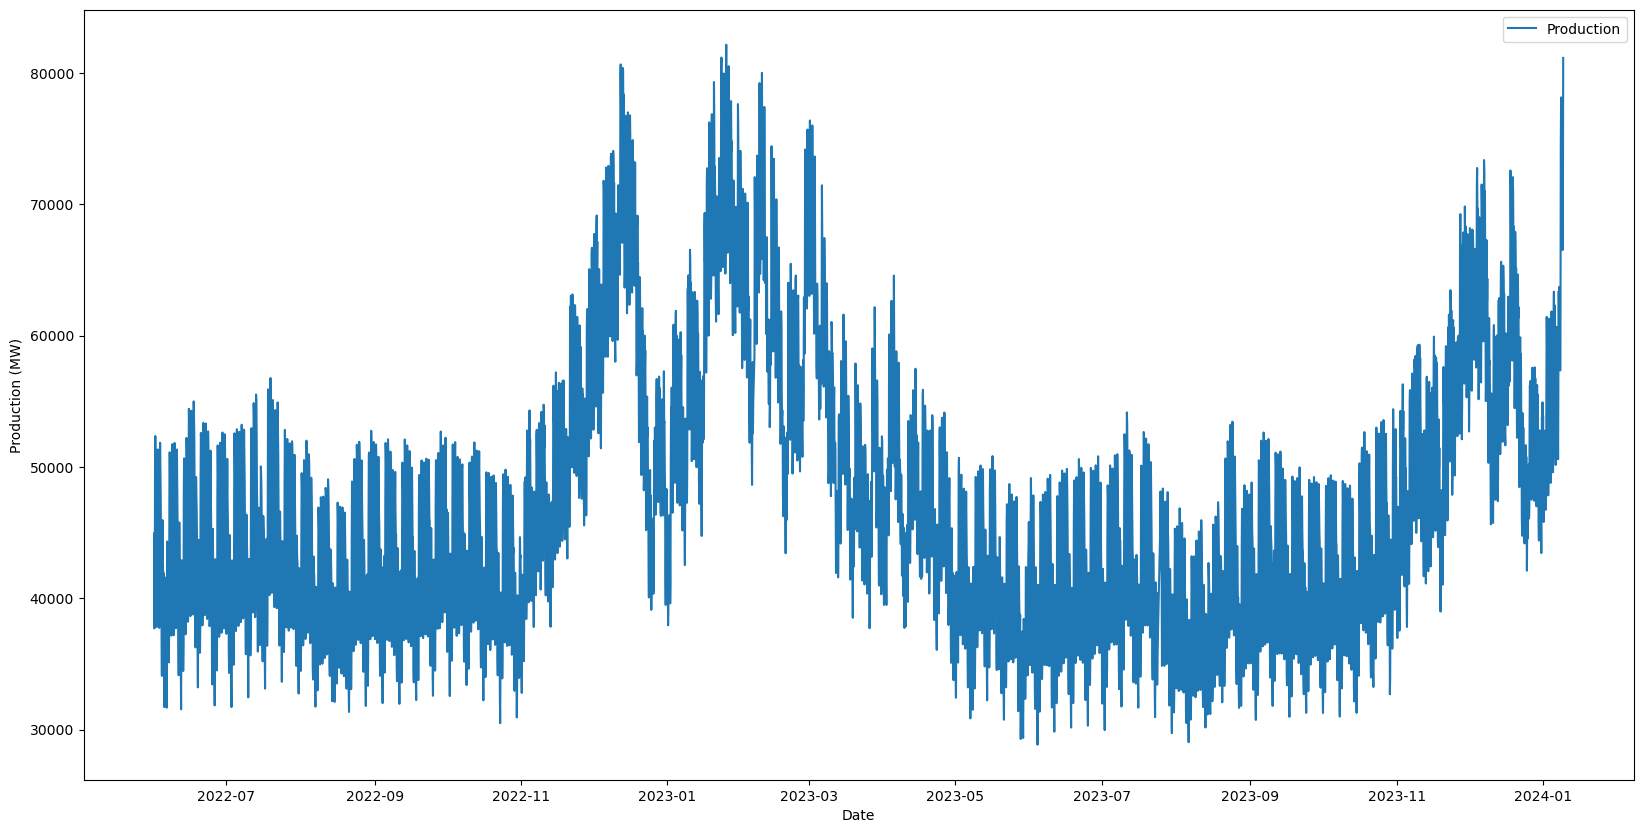

In [85]:
figure = plt.figure(figsize=(20,10))
plt.plot(df_selection["date"], df_selection["Consommation"], label=column)
plt.legend( loc='upper right', numpoints = 1 )
plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.show()

Visualisation des données de production

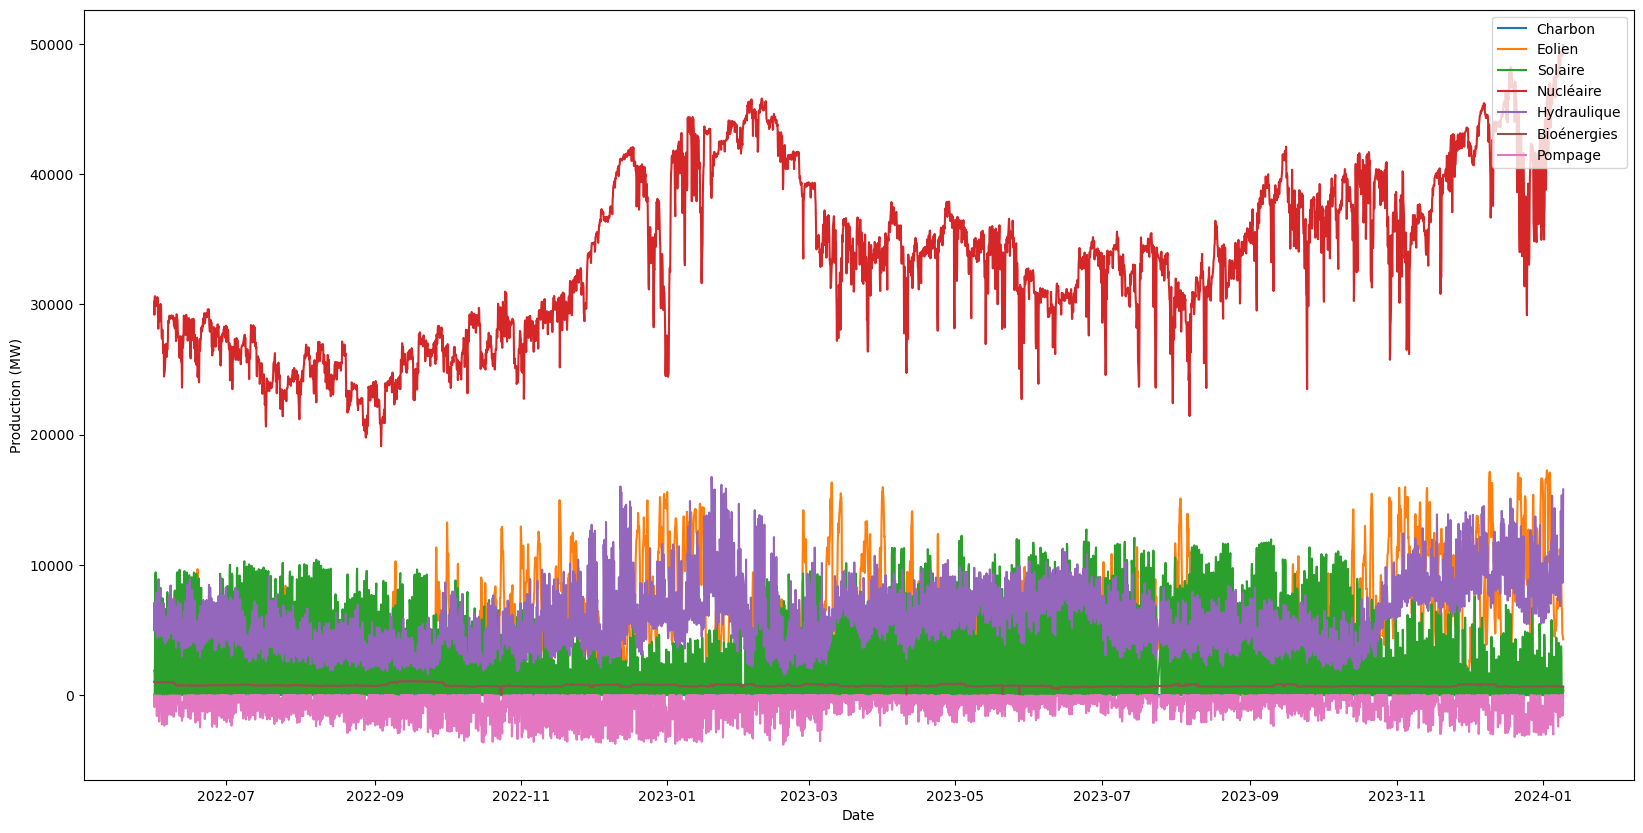

In [86]:
to_plot = ["Charbon", "Eolien", "Solaire", "Nucléaire", "Hydraulique", "Bioénergies", "Pompage"]

figure = plt.figure(figsize=(20,10))
for column in to_plot :
    plt.plot(df_selection["date"], df_selection[column], label=column)
    plt.legend( loc='upper right', numpoints = 1 )

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.show()


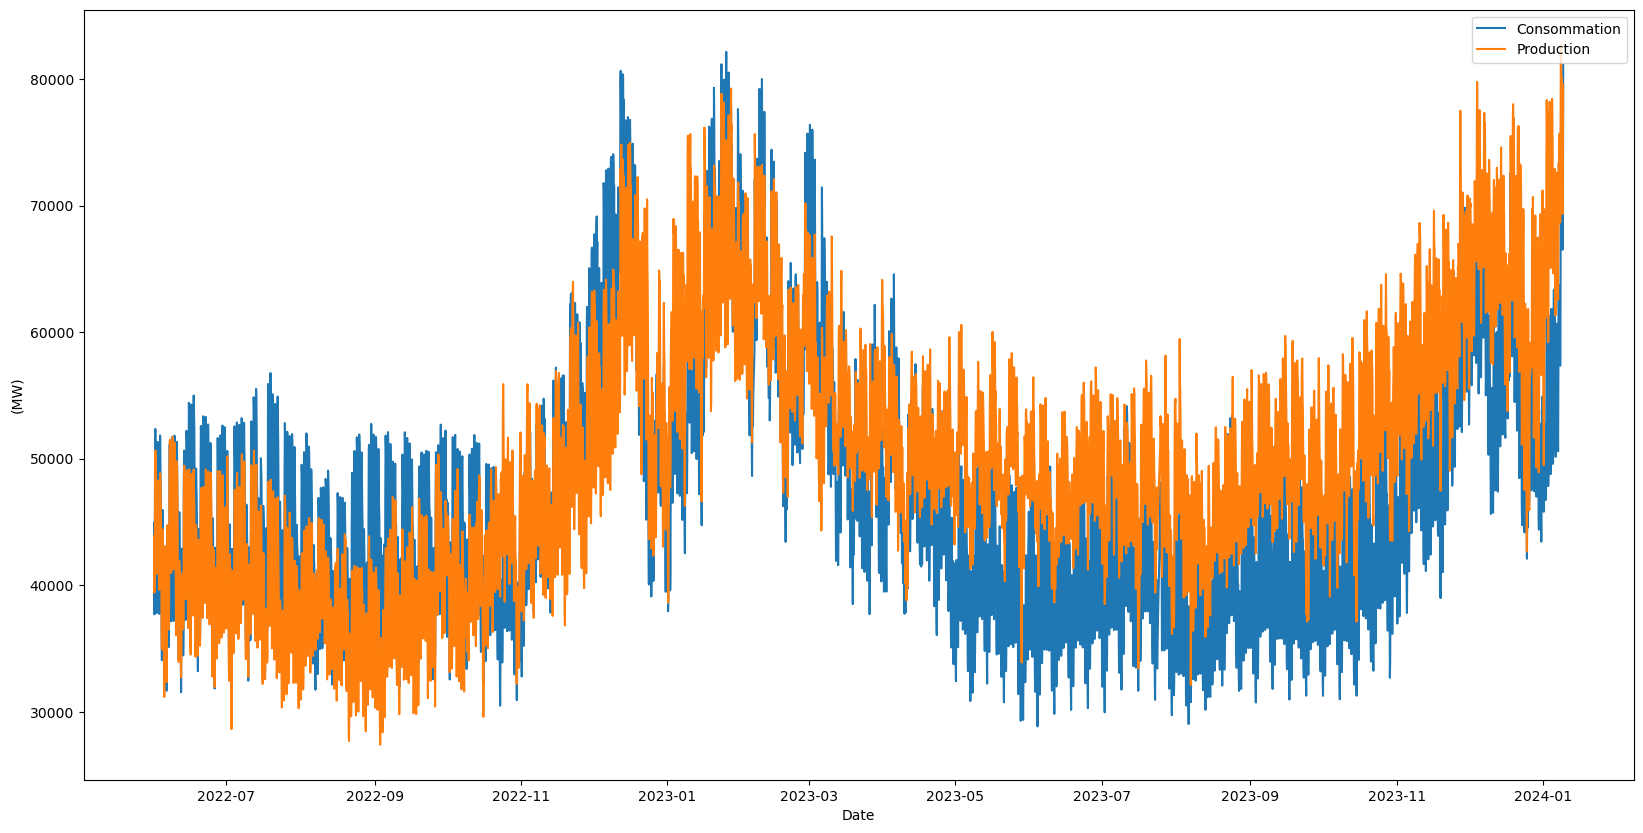

In [87]:
to_plot = ["Consommation", "Production"]

figure = plt.figure(figsize=(20,10))
for column in to_plot :
    plt.plot(df_selection["date"], df_selection[column], label=column)
    plt.legend( loc='upper right', numpoints = 1 )

plt.xlabel('Date')
plt.ylabel('(MW)')
plt.show()

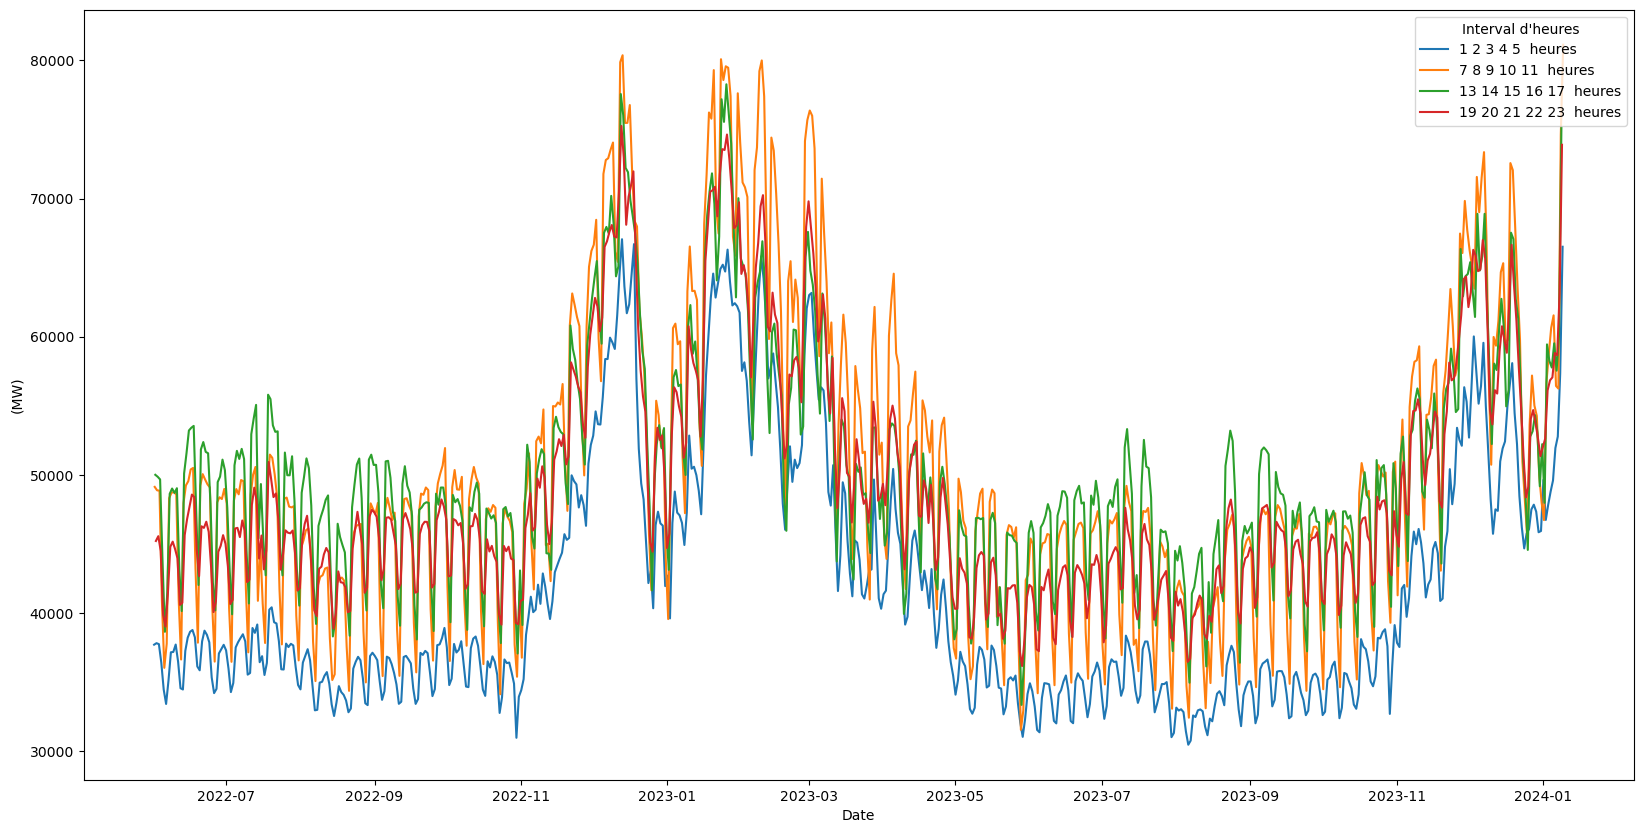

In [88]:
bin_size = 6

figure = plt.figure(figsize=(20,10))
for i in range(0, 24, bin_size):
    lab = ""
    to_plot = pd.DataFrame()
    for j in range(1, bin_size):
        lab += str(i+j) + ' '
        to_plot = pd.concat([to_plot, df_selection[pd.to_datetime(df_selection["Heures"]).dt.hour == i+j]])
    
    lab += " heures"
    
    plt.plot(to_plot["date"], to_plot['Consommation'], label=lab)
    plt.legend( loc='upper right', numpoints = 1 , title="Interval d'heures")
#plt.plot(df.groupby([ time_date , time_date.dt.hour 'heure']).Consommation.sum())
plt.xlabel('Date')
plt.ylabel('(MW)')
plt.show()

### Quelles sont les sources de production d'énergie les plus corrélées ?

Selections des colonnes liées à la production et description de celles-ci

In [89]:
df_energies = df_full[["Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies", "Consommation"]]

df_energies.describe()

,Charbon,Gaz,Fioul,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Consommation
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000
mean,140.350832,3674.569569,194.186726,33480.039052,4997.992744,2346.130815,5816.970764,734.748186,47967.997226
std,347.545906,2230.195333,149.440732,6336.347225,3709.579562,3231.443801,2525.464595,98.445806,9823.061604
min,0.000000,243.000000,106.000000,19107.000000,557.000000,0.000000,1578.000000,0.000000,28847.000000
25%,14.000000,1984.250000,136.000000,28331.250000,2124.250000,0.000000,3898.250000,674.000000,40878.250000
50%,24.000000,3381.500000,151.500000,33675.500000,3724.500000,242.500000,5462.500000,708.000000,46564.000000
75%,40.000000,4827.250000,188.000000,38078.750000,6823.750000,4250.750000,7201.000000,783.000000,52944.000000
max,1835.000000,9728.000000,1453.000000,49929.000000,17263.000000,12721.000000,16754.000000,1109.000000,82142.000000


Matrice de corrélation

In [90]:
df_energies.corr()

,Charbon,Gaz,Fioul,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,Consommation
Charbon,1.000000,0.572152,0.278885,0.280139,-0.075565,-0.110977,0.183653,0.101094,0.560330
Gaz,0.572152,1.000000,0.323183,0.227681,-0.182312,-0.192930,0.253852,0.171060,0.690027
Fioul,0.278885,0.323183,1.000000,0.112769,-0.025401,-0.105957,0.217100,0.022434,0.327731
Nucléaire,0.280139,0.227681,0.112769,1.000000,0.230458,-0.170111,0.502197,-0.167234,0.612484
Eolien,-0.075565,-0.182312,-0.025401,0.230458,1.000000,-0.203797,0.177357,-0.098816,0.148571
Solaire,-0.110977,-0.192930,-0.105957,-0.170111,-0.203797,1.000000,-0.203501,-0.056004,0.061749
Hydraulique,0.183653,0.253852,0.217100,0.502197,0.177357,-0.203501,1.000000,-0.138711,0.547995
Bioénergies,0.101094,0.171060,0.022434,-0.167234,-0.098816,-0.056004,-0.138711,1.000000,0.060597
Consommation,0.560330,0.690027,0.327731,0.612484,0.148571,0.061749,0.547995,0.060597,1.000000


#### Conclusion
TODO: Mathieu

### Quelles est la proportion d'énergie renouvelable produite ?

Calcul de la production globale d'énergie sur la période du dataset

In [91]:
name_col =["Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]

df_energies = df_full[name_col]

df_energies = df_energies.dropna()

total_energies = sum(df_energies.sum(axis=1))
print(f"Production total : {total_energies} MW")

Production total : 240790057.0 MW


Calcul des proportions de chaque source d'énergie

In [92]:
sum_dic = {}
pourcent_dic = {}
for col in name_col:
    sum_dic[col] = sum(df_energies[col])
    pourcent_dic[col] = sum_dic[col]/total_energies*100
    
pourcent_df = pd.DataFrame.from_dict(pourcent_dic, orient='index', columns=['%'])
print(pourcent_df)

                     %
Charbon       0.273136
Gaz           7.151056
Fioul         0.377906
Nucléaire    65.155291
Eolien        9.726562
Solaire       4.565790
Hydraulique  11.320370
Bioénergies   1.429889


Aggrégation des sources d'énergie en 3 catégories : renouvelable, fossile et nucléaire

In [93]:
renouvelable = ["Eolien","Solaire","Hydraulique","Bioénergies"]
pourcent_renouvelable = sum([pourcent_dic[nrj12] for nrj12 in renouvelable])
print(f"Pourcentage d'énergie renouvelable : {pourcent_renouvelable:.2f} %")

fossil = ["Charbon","Gaz","Fioul"]
pourcent_fossil = sum([pourcent_dic[nrj12] for nrj12 in fossil])
print(f"Pourcentage d'énergie fossile : {pourcent_fossil:.2f} %")

nuclear = ["Nucléaire"]
pourcent_nuclear = sum([pourcent_dic[nrj12] for nrj12 in nuclear])
print(f"Pourcentage d'énergie nucléaire : {pourcent_nuclear:.2f} %")

Pourcentage d'énergie renouvelable : 27.04 %
Pourcentage d'énergie fossile : 7.80 %
Pourcentage d'énergie nucléaire : 65.16 %


Les énergies renouvelables représente plus d'un quart de la production total d'énergie.

### Quelles sont les tendances de méthode de production d'énergie au cours de l'année ?
TODO: mathieu
separer données en plusieurs periode et les plot

### Quelles sont les périodes de l'année où la production d'énergie est la plus importante/faible ?

Séparation des données par mois de l'année.

In [94]:
date1 = pd.to_datetime('2022-12-01')
date2 = pd.to_datetime('2023-12-01')
df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]

name_col =["date","Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]

df_energies = df_full[name_col]

df_energies = df_energies.dropna()


mois = ["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
mois_dict = {}
sum_mois_dict = {}
name_col.pop(0)
for i in range(len(mois)):
    date1 = pd.to_datetime('2023-'+str(i+1)+'-01')
    if i==11:
        date1 = pd.to_datetime('2022-'+str(i+1)+'-01')
        date2 = pd.to_datetime('2022-'+str(i+1)+'-31')
        mois_dict[mois[i]]=df_energies[(df_energies['date'] >= date1) & (df_energies['date'] <= date2)]
    else:
        date2 = pd.to_datetime('2023-'+str(i+2)+'-01')
        mois_dict[mois[i]]=df_energies[(df_energies['date'] >= date1) & (df_energies['date'] < date2)]
    mois_dict[mois[i]] = mois_dict[mois[i]].drop(columns=['date'])
    for nrj12 in name_col:
        mois_dict[mois[i]][nrj12] =sum(mois_dict[mois[i]][nrj12])
    mois_dict[mois[i]] = mois_dict[mois[i]].iloc[0]

df_prod_final =mois_dict["Janvier"]
df_prod_final = pd.DataFrame.from_dict(df_prod_final).T
# print(df_prod_final)
for month, df_nrj in mois_dict.items():
    # print(pd.DataFrame.from_dict(df_nrj).T)
    df_prod_final = pd.concat([df_prod_final,pd.DataFrame.from_dict(df_nrj).T])
df_prod_final = df_prod_final.tail(-1)
df_prod_final.insert(0, "Mois", mois, True)
df_prod_final = df_prod_final.set_index("Mois")
# print(df_prod_final)

Affichage

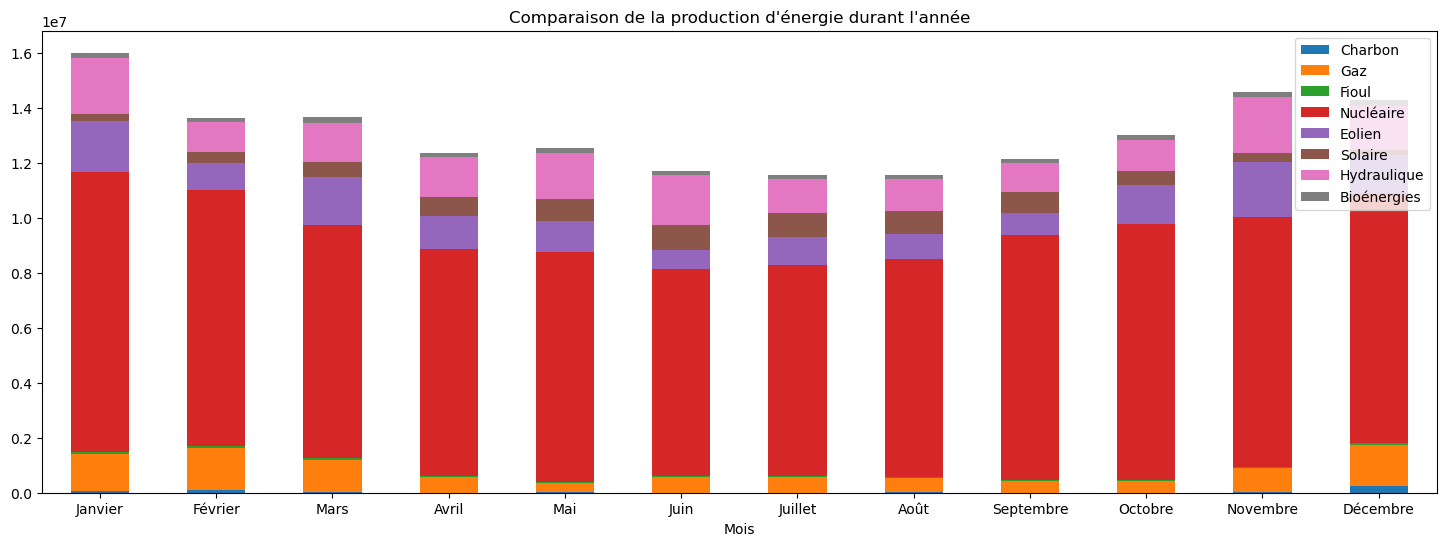

In [95]:
ax = df_prod_final.plot.bar(stacked=True, figsize=(18,6))

ax.set_xticklabels(mois, rotation=0)
ax.set_title("Comparaison de la production d'énergie durant l'année")
ax.legend(loc="upper right")

### Quelles sont les moments de la journée où la production d'énergie est la plus importante/faible ?

Somme des données de production en une seule

In [96]:
name_col =["date","Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]

df_energies = df_full[name_col]

df_energies = df_energies.dropna()
name_col.pop(0)
df_energies["prod_total"] = df_energies[name_col].sum(axis=1)

date1= pd.to_datetime('11:02')
time_dict = {}
for ind in df_energies.index:
    heure = df_energies["date"][ind].hour
    if heure not in time_dict.keys():
        time_dict[heure] = df_energies["prod_total"][ind]
    else:
        time_dict[heure] += df_energies["prod_total"][ind] 
        # print(f'date: {df_energies["date"][ind]}, conso: {df_energies["conso_total"][ind]}')
print(time_dict)

{0: 29027039.0, 3: 27292424.0, 6: 27613682.0, 9: 30856493.0, 12: 32436216.0, 15: 31787524.0, 18: 31391202.0, 21: 30385477.0}


Affichage

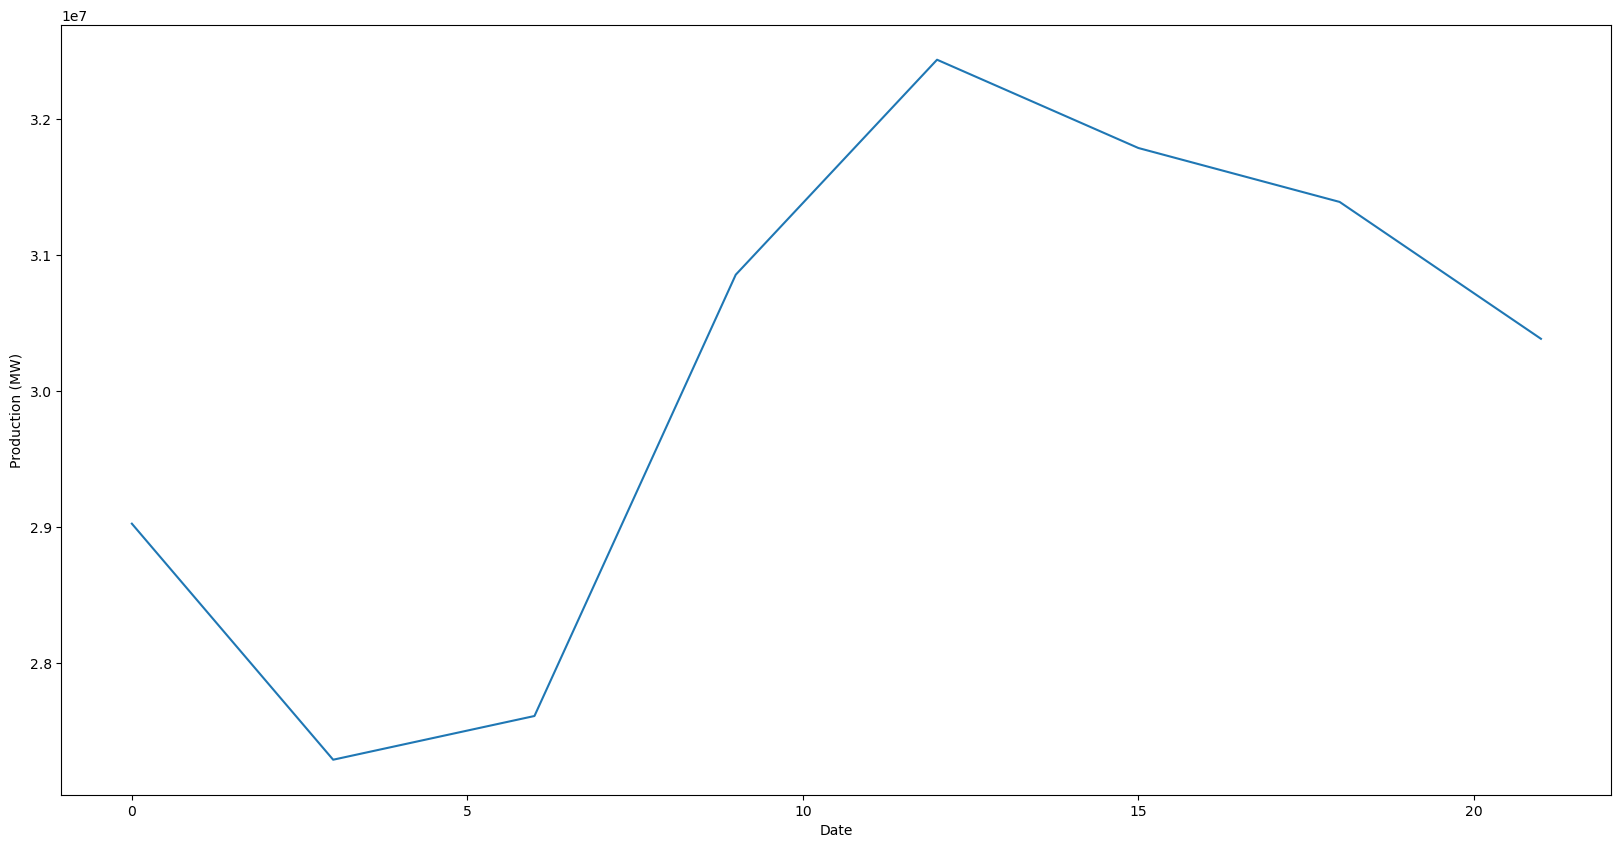

In [97]:
figure = plt.figure(figsize=(20,10))
plt.plot(time_dict.keys(), time_dict.values(), label=str(heure))

plt.xlabel('Date')
plt.ylabel('Production (MW)')
plt.show()

### La météo influe-t-elle sur la consomation d'énergie ?


In [98]:
col_names = ["Consommation", "température", "vitesse_vent", "humidité", "pression", "précipitation_24h", "hauteur_neige"]
# df_full.columns.values.tolist()

df_selection = df_full[col_names]
#removes lines with nan or None
df_selection = df_selection.dropna()

df_selection.describe()

,Consommation,température,vitesse_vent,humidité,pression,précipitation_24h,hauteur_neige
count,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000
mean,50120.349942,286.610413,3.992254,72.667186,100548.100428,1.874387,0.000016
std,10163.485924,7.733238,1.990792,18.511199,949.868234,4.452483,0.000394
min,28847.000000,267.050000,0.000000,14.000000,96290.000000,-0.100000,0.000000
25%,43105.000000,281.350000,2.500000,60.000000,100020.000000,0.000000,0.000000
50%,48773.000000,285.550000,3.800000,77.000000,100610.000000,0.200000,0.000000
75%,56032.000000,292.050000,5.300000,88.000000,101140.000000,1.600000,0.000000
max,82142.000000,309.050000,13.100000,100.000000,103220.000000,44.000000,0.010000


Matrice de corrélation

In [99]:
corr_matrix = df_selection.corr()

# for only the "Consommation" column sort by descending order of absolute values
pd.DataFrame(corr_matrix["Consommation"].sort_values(ascending=False, key=lambda x: abs(x)))

,Consommation
Consommation,1.000000
température,-0.589399
humidité,0.149542
pression,0.116955
vitesse_vent,0.099146
hauteur_neige,0.098098
précipitation_24h,-0.081093


### Conclusion

On remarque que la température est inversement corrélée avec la consomation d'énergie. Cela est logique car plus il fait froid, plus les gens chauffent leur logement.
Cependant c'est la seule corrélation notable.

### Quelles sont les sources de production d'énergie les plus corrélées avec la météo ?

In [100]:
col_names_prod =["Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]
col_names_weather = ["température", "vitesse_vent", "humidité", "pression", "précipitation_24h", "hauteur_neige"]

df_selection = df_full[col_names_prod + col_names_weather]
df_selection = df_selection.dropna()

df_selection.describe()

,Charbon,Gaz,Fioul,Nucléaire,Eolien,Solaire,Hydraulique,Bioénergies,température,vitesse_vent,humidité,pression,précipitation_24h,hauteur_neige
count,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000,2569.000000
mean,173.657065,3868.899961,195.500584,34378.000779,5297.052160,2946.625146,6025.780849,729.434410,286.610413,3.992254,72.667186,100548.100428,1.874387,0.000016
std,389.904140,2412.850768,143.756880,6422.875683,3965.517674,3508.037244,2723.638374,95.757509,7.733238,1.990792,18.511199,949.868234,4.452483,0.000394
min,0.000000,243.000000,107.000000,19774.000000,557.000000,0.000000,1578.000000,0.000000,267.050000,0.000000,14.000000,96290.000000,-0.100000,0.000000
25%,14.000000,1977.000000,137.000000,29044.000000,2157.000000,0.000000,3944.000000,672.000000,281.350000,2.500000,60.000000,100020.000000,0.000000,0.000000
50%,24.000000,3482.000000,162.000000,34312.000000,3929.000000,1082.000000,5590.000000,702.000000,285.550000,3.800000,77.000000,100610.000000,0.200000,0.000000
75%,45.000000,5368.000000,191.000000,39806.000000,7371.000000,5197.000000,7460.000000,785.000000,292.050000,5.300000,88.000000,101140.000000,1.600000,0.000000
max,1835.000000,9728.000000,1442.000000,49929.000000,17263.000000,12083.000000,16145.000000,1092.000000,309.050000,13.100000,100.000000,103220.000000,44.000000,0.010000


In [101]:
#create a dataset with with the correlation between the production and the weather for each energy
corr_dataset = pd.DataFrame()
for col_name in col_names_prod:
    current_df = df_selection[[col_name] + col_names_weather]
    corr_matrix = current_df.corr()

    corr_list = corr_matrix[col_name]
    
    corr_dataset.insert(0, col_name, corr_matrix[col_name])

corr_dataset.dropna()

,Bioénergies,Hydraulique,Solaire,Eolien,Nucléaire,Fioul,Gaz,Charbon
température,-0.090729,-0.472888,0.635130,-0.276655,-0.607624,-0.312969,-0.528084,-0.466629
vitesse_vent,-0.022591,0.081443,0.131814,0.657185,0.054905,-0.035871,-0.210869,-0.094984
humidité,0.010362,0.290389,-0.727635,0.287502,0.316416,0.134315,0.246262,0.177217
pression,0.046700,-0.034855,0.122045,-0.461556,0.072144,0.023148,0.222178,0.125449
précipitation_24h,0.063150,0.010496,-0.092936,0.236307,-0.049555,-0.041832,-0.097968,-0.103080
hauteur_neige,-0.025959,0.102190,-0.030798,-0.009249,0.080290,0.025071,0.070399,0.037947


### Conclusion

On remarque que la température influence toutes les produciont d'énérgie, quand il fait froid la production augmentent et inversement. Sauf pour le solaire qui est inversé car on produit plus d'énergie solaire en été lorsque le soeil est haut.

L'autre corrélation notable est celle entre le solaire et l'humidité. Cela est logique car il y a plus de nuage lorsque l'humidité est élevée et donc moins de soleil. De même pour les temps pluvieux. Cependant la corrélation entre le solaire et les précipitations des dernières 24h est inexistante, ce qui est très étonnant.

L'humidité à également un impact sur la production d'énégie hydrolique. Cela est logique car il y a plus d'eau dans les barages. Cependant elle a également in impact sur l'éolien, le nucléaire, le gaz et le charbon. Cela est plus difficile à expliquer.

La dernière corrélation est entre la vitesse du vent, la pression et la production d'énérgie éolienne qui est tout à fait logique, les pression et dépression entrainne du vent qui favorisent la production d'énergie éolienne.

### Classification des jours de l'année par rapport à la consomation d'énergie.
classifié binaire et classifié par la semaine

In [103]:
date1 = pd.to_datetime('2022-12-01')
date2 = pd.to_datetime('2023-12-01')
df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]
name_col =["date","Consommation","Charbon", "Gaz", "Fioul", "Nucléaire", "Eolien", "Solaire", "Hydraulique", "Bioénergies"]
semaine = ["Lundi","Mardi","Mercredi","Jeudi","Vendredi","Samedi","Dimanche"]
df_energies = df_full[name_col]

df_energies = df_energies.dropna()
day_df= pd.DataFrame()
set_jour=set()
for ind in df_energies.index:
    jour = (df_energies["date"][ind].day,  df_energies["date"][ind].month)
    day_of_week = df_energies["date"][ind].weekday()
    row_dict = {}
    if jour not in set_jour:
        day_df = day_df.append(row_dict,ignore_index=True)
        set_jour.add(jour)
        row_dict["jour"] = semaine[day_of_week]
        for column in name_col:
            row_dict[column] = df_energies[column][ind]
    else:
        for column in name_col:
            if column!="date":
                row_dict[column] += df_energies[column][ind]
                row_dict[column]/=2

        
print(day_df)

C:\Users\tmani\AppData\Local\Temp\ipykernel_14448\3293271317.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  day_df = day_df.append(row_dict,ignore_index=True)
C:\Users\tmani\AppData\Local\Temp\ipykernel_14448\3293271317.py:16: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  day_df = day_df.append(row_dict,ignore_index=True)


KeyError: 'Consommation'

# 4. Prédiction

### Quelle est la tendance de production d'énergie pour les jours/mois/années à venir ?


In [ ]:
#time series prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#select rows between date1 and date 2

date1 = pd.to_datetime('2022-06-01')
date2 = pd.to_datetime('2023-12-01')

df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]

print(df_selection)

#df_selection = df_selection[col_names_prod + col_names_weather]

#df_selection = df_selection.dropna()

print(df_selection)

X = df_selection[col_names_weather]
y = df_selection["Nucléaire"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg = LinearRegression().fit(X_train, y_train)

reg.score(X_test, y_test)

y_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from random import random
# contrived dataset
data = [x + random() for x in range(1, 100)]
# fit model
model = ARIMA(data, order=(0, 0, 1))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(data), len(data))
print(yhat)

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

date1 = pd.to_datetime('2022-06-01')
date2 = pd.to_datetime('2023-12-01')

col_names = ["Consommation", "Production", "Bioénergies",	"Hydraulique",	"Solaire",	"Eolien",	"Nucléaire",	"Fioul",	"Gaz",	"Charbon"]

#df_selection = df_full[(df_full['date'] >= date1) & (df_full['date'] < date2)]
df_selection = df[(df['Date'] >= date1) & (df['Date'] < date2)]
df_selection = df_selection.dropna()

X = df_selection[col_names]
y = df_selection["Nucléaire"]

#print(X)

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

kmeans.labels_

y_pred = KMeans(n_clusters=4).fit_predict(X)

print(len(X))
print(len(df_selection["Date"]))
print(len(y_pred))

figure = plt.figure(figsize=(20,10))
plt.scatter(df_selection["Date"], X["Consommation"], c=y_pred)
plt.title("Clustering")
plt.xlabel('Date')
plt.ylabel('(MW)')
plt.show()

#kmeans.predict([[0, 0], [12, 3]])
#kmeans.cluster_centers_